<a href="https://colab.research.google.com/github/SanjayBista1010/Classification/blob/main/DiseaseRiskAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('disease_risk.csv')
df

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,95395,22,Female,162.932524,67.564516,25.450898,25.450898,76.352693,25.343248,97.087870,132.151511,99.337130,189.196300,108.626249,15.046376,6.876157,Excellent,10.422726,3.111490,8368.383309,1850.596805,97.463847,NaN,Light,2.973462,2.921232,5,10,No,Master,Labor,Farmer,2857.320235,Keto,Cardio,High,Poor,Yes,Low,2,NaN,No,No,0,1.0,5.5,1.336250,healthy
1,5448,47,Female,171.547964,52.804671,17.943254,17.943254,53.829762,18.053942,95.888834,116.171940,67.499438,195.072178,120.528981,8.255944,6.456177,Fair,7.787357,3.231989,7938.704919,1864.938695,51.709036,Occasionally,Non-smoker,1.259687,4.832610,4,3,Yes,Bachelor,Healthcare,Farmer,6548.228475,Vegan,Cardio,Moderate,Poor,No,High,3,NaN,Yes,Yes,0,1.0,5.5,1.180061,diseased
2,73751,55,Female,170.966555,44.804159,15.328371,15.328371,45.985114,15.296274,77.344088,127.030570,63.610472,159.772494,99.224745,15.843748,7.320258,Fair,6.544831,6.138907,5673.534557,1759.140043,38.845329,Regularly,Heavy,2.316328,4.982927,0,9,No,Bachelor,Tech,Teacher,2549.965306,Keto,Mixed,High,Good,Yes,High,2,NaN,No,Yes,0,1.0,5.5,2.321793,diseased
3,58660,27,Female,178.287821,40.000000,12.583940,12.583940,37.751820,12.643315,61.743057,123.106043,91.380544,212.788297,75.391804,4.965942,4.487325,Poor,8.634154,1.934497,6233.281463,2291.912789,54.846048,NaN,Light,2.502264,10.780279,4,0,No,Bachelor,Unemployed,Farmer,2322.460226,Vegetarian,NaN,Low,Good,No,Moderate,3,High,Yes,Yes,0,1.0,5.5,-3.495835,diseased
4,57504,24,Female,194.568973,84.264569,22.258599,22.258599,66.775798,22.513544,91.287708,130.915270,64.180530,197.776095,93.184091,NaN,3.511518,Good,4.874924,4.135976,10956.957845,2386.572024,83.220557,NaN,Non-smoker,2.174174,5.453455,5,2,No,Bachelor,Unemployed,Teacher,4742.466750,Vegan,Cardio,High,Poor,No,High,4,NaN,Yes,No,0,1.0,5.5,-4.914426,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,25307,53,Male,162.682355,89.601849,33.856033,33.856033,101.568100,34.004342,89.488454,129.380077,76.063089,198.522946,81.855581,11.018841,8.087586,Good,7.176379,2.398722,8514.470177,2343.205984,51.156766,Occasionally,Non-smoker,2.989209,7.415820,2,3,No,Bachelor,Tech,Engineer,877.435530,Vegetarian,Cardio,Moderate,Good,Yes,Low,4,NaN,No,No,0,1.0,5.5,5.154871,diseased
29996,17448,23,Male,160.250212,67.624275,26.333307,26.333307,78.999920,26.381995,87.209088,100.658001,65.561732,220.064925,146.131691,17.212978,9.842056,Fair,5.832487,4.131165,6800.657789,2381.888802,42.161263,NaN,Heavy,2.366341,7.491023,10,8,No,Bachelor,Unemployed,Artist,5407.141861,Vegan,NaN,Low,Moderate,No,High,1,NaN,Yes,No,0,1.0,5.5,-8.199162,healthy
29997,10896,68,Male,174.657371,61.878333,20.284522,20.284522,60.853565,20.509179,79.151644,114.879480,61.500441,250.293758,105.553492,NaN,9.021386,Good,5.583392,0.656181,5931.188675,1741.230691,23.744050,Occasionally,Light,1.521417,7.955565,10,9,Yes,High School,Tech,Driver,2464.960044,Vegan,Strength,Moderate,Moderate,Yes,High,3,Moderate,Yes,Yes,0,1.0,5.5,5.205425,healthy
29998,22545,73,Male,168.392397,46.486714,16.393961,16.393961,49.181883,16.291237,71.186494,NaN,79.535017,187.587866,117.829075,20.562741,5.467089,Fair,8.705341,3.092682,10499.236717,2134.074080,45.629988,NaN,Light,1.914931,10.511659,1,9,No,Master,Labor,Engineer,7588.911079,Vegan,Na

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   survey_code               30000 non-null  int64  
 1   age                       30000 non-null  int64  
 2   gender                    30000 non-null  object 
 3   height                    30000 non-null  float64
 4   weight                    30000 non-null  float64
 5   bmi                       30000 non-null  float64
 6   bmi_estimated             30000 non-null  float64
 7   bmi_scaled                30000 non-null  float64
 8   bmi_corrected             30000 non-null  float64
 9   waist_size                30000 non-null  float64
 10  blood_pressure            27679 non-null  float64
 11  heart_rate                25736 non-null  float64
 12  cholesterol               30000 non-null  float64
 13  glucose                   30000 non-null  float64
 14  insuli

In [106]:
df['target'].value_counts()

,count
target,
healthy,16500
diseased,13500


In [107]:
df['alcohol_consumption'].value_counts()

,count
alcohol_consumption,
Occasionally,8620
Regularly,8564


In [108]:
df['healthcare_access'].value_counts()

,count
healthcare_access,
Good,10126
Moderate,9948
Poor,9926


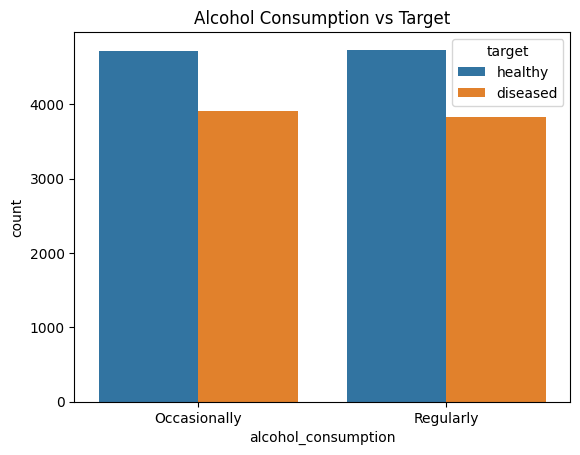

In [109]:
sns.countplot(x='alcohol_consumption', hue='target', data=df)
plt.title('Alcohol Consumption vs Target')
plt.show()

In [110]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['alcohol_consumption'], df['target'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("✅ Statistically significant relationship.")
else:
    print("❌ No significant relationship.")

Chi-square statistic: 0.56
P-value: 0.4544
❌ No significant relationship.


In [111]:
df = df.drop(columns=['alcohol_consumption'])

In [112]:
df['exercise_type'].value_counts()

,count
exercise_type,
Mixed,7520
Strength,7506
Cardio,7424


In [113]:
df['exercise_type'] = df['exercise_type'].fillna(df['exercise_type'].mode()[0])

<Axes: >

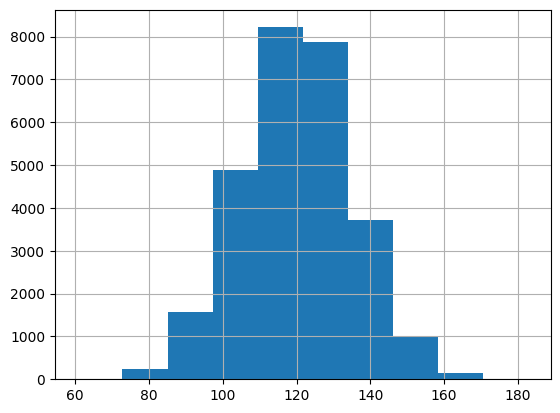

In [114]:
df['blood_pressure'].hist()

In [115]:
df['blood_pressure'].describe()

,blood_pressure
count,27679.000000
mean,120.014711
std,15.053383
min,60.605842
25%,109.823483
50%,120.111696
75%,130.038478
max,182.799505


In [116]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].mean())

In [117]:
df.isna()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [118]:
missing_info = pd.DataFrame({
    'dtype': df.dtypes,
    'missing_count': df.isna().sum(),
    'missing_percent': df.isna().mean() * 100
})
print(missing_info)

                            dtype  missing_count  missing_percent
survey_code                 int64              0         0.000000
age                         int64              0         0.000000
gender                     object              0         0.000000
height                    float64              0         0.000000
weight                    float64              0         0.000000
bmi                       float64              0         0.000000
bmi_estimated             float64              0         0.000000
bmi_scaled                float64              0         0.000000
bmi_corrected             float64              0         0.000000
waist_size                float64              0         0.000000
blood_pressure            float64              0         0.000000
heart_rate                float64           4264        14.213333
cholesterol               float64              0         0.000000
glucose                   float64              0         0.000000
insulin   

In [119]:
df['caffeine_intake'].value_counts()

,count
caffeine_intake,
Moderate,10022
High,9967


In [120]:
df = df.drop(columns=['caffeine_intake'])

<Axes: >

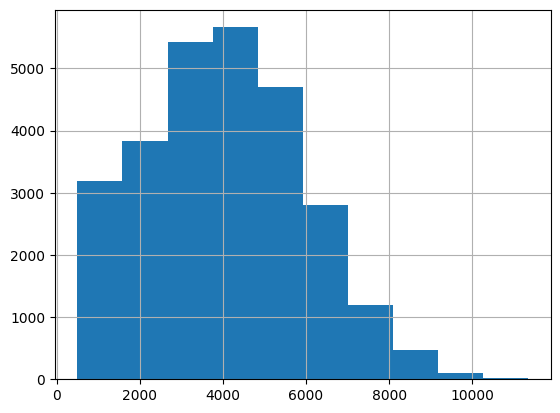

In [121]:
df['income'].hist()

In [122]:
df['income'].describe()

,income
count,27394.000000
mean,4024.457918
std,1939.868424
min,500.000000
25%,2632.408362
50%,3989.135087
75%,5351.945696
max,11349.443420


In [123]:
df['income'] = df['income'].fillna(df['income'].median())

In [124]:
df['gene_marker_flag'].value_counts()

,count
gene_marker_flag,
1.0,26860


In [125]:
df = df.drop(columns=['gene_marker_flag'])

<Axes: >

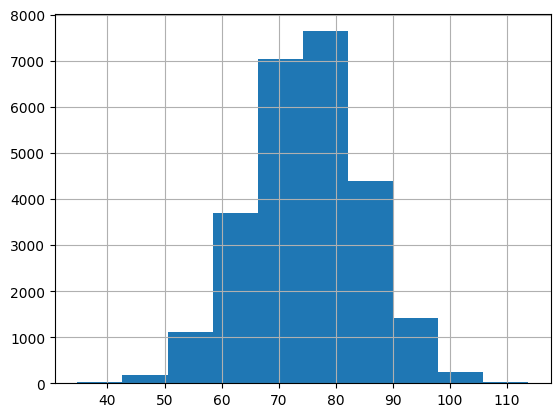

In [126]:
df['heart_rate'].hist()

In [127]:
df['heart_rate'].describe()

,heart_rate
count,25736.000000
mean,74.904096
std,9.997813
min,34.745092
25%,68.166687
50%,75.014065
75%,81.642065
max,113.699566


In [128]:
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())

<Axes: >

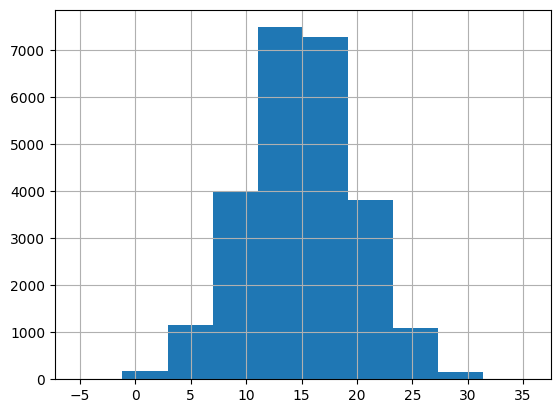

In [129]:
df['insulin'].hist()

In [130]:
df['insulin'].describe()

,insulin
count,25217.000000
mean,15.015134
std,4.996720
min,-5.227445
25%,11.646032
50%,14.990514
75%,18.389274
max,35.464749


In [131]:
df['insulin'] = df['insulin'].mask(df['insulin'] < 0, np.nan)

In [132]:
df['insulin'].isna().sum()

np.int64(4814)

In [133]:
df['insulin'] = df['insulin'].fillna(df['insulin'].median())

<Axes: >

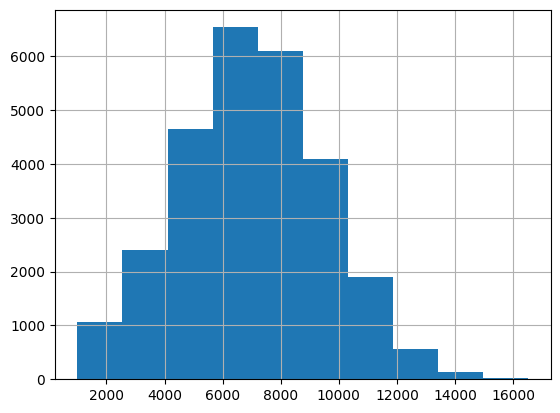

In [134]:
df['daily_steps'].hist()

In [135]:
df['daily_steps'].describe()

,daily_steps
count,27426.000000
mean,7009.876664
std,2504.764514
min,1000.000000
25%,5314.420105
50%,7001.373532
75%,8714.414884
max,16521.256223


In [136]:
df['daily_steps'] = df['daily_steps'].fillna(df['daily_steps'].median())

In [137]:
target_mapping = {'healthy': 0, 'diseased': 1}
df['target_numeric'] = df['target'].replace(target_mapping)

/tmp/ipython-input-137-3060353490.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target_numeric'] = df['target'].replace(target_mapping)


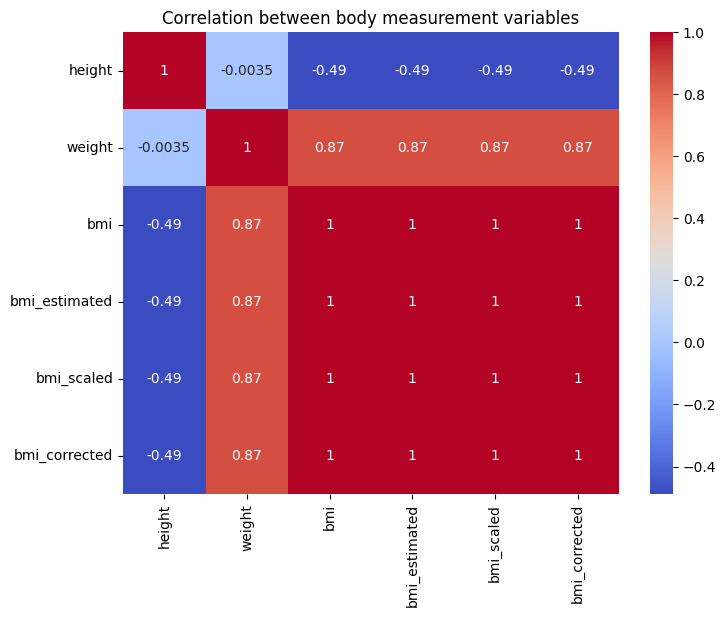

In [138]:
cols_to_check = ['height', 'weight', 'bmi', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected']
corr_matrix = df[cols_to_check].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between body measurement variables')
plt.show()

In [139]:
df = df.drop(columns=['bmi_estimated', 'bmi_scaled', 'bmi_corrected'])

In [140]:
df = df.drop(columns=['survey_code'])

In [141]:
neg_count = (df['daily_supplement_dosage'] < 0).sum()
neg_count

np.int64(14989)

In [142]:
df = df.drop(columns=['daily_supplement_dosage'])

In [143]:
pd.set_option('display.max_columns', None)
desc = df.describe(include='all')
desc_sorted = desc.sort_values(by='mean', axis=1)
print(desc_sorted)

        electrolyte_level  target_numeric  water_intake  meals_per_day  \
count             30000.0    30000.000000  30000.000000   30000.000000   
unique                NaN             NaN           NaN            NaN   
top                   NaN             NaN           NaN            NaN   
freq                  NaN             NaN           NaN            NaN   
mean                  0.0        0.450000      2.011123       2.997633   
std                   0.0        0.497502      0.690944       1.419728   
min                   0.0        0.000000      0.500000       1.000000   
25%                   0.0        0.000000      1.532278       2.000000   
50%                   0.0        0.000000      2.007112       3.000000   
75%                   0.0        1.000000      2.480434       4.000000   
max                   0.0        1.000000      5.000000       5.000000   

        physical_activity  stress_level  mental_health_score  \
count        30000.000000  30000.000000        

In [144]:
neg_count = (df['sugar_intake'] < 0).sum()
neg_count

np.int64(41)

In [145]:
df['sugar_intake'] = df['sugar_intake'].mask(df['sugar_intake'] < 0, np.nan)

<Axes: >

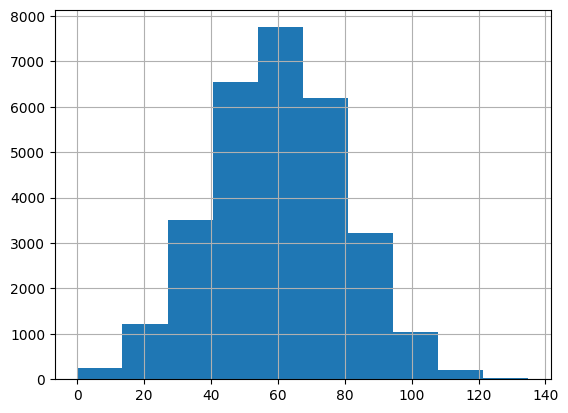

In [146]:
df['sugar_intake'].hist()

In [147]:
df['sugar_intake']=df['sugar_intake'].fillna(df['sugar_intake'].mean())

In [148]:
df = df.drop(columns=['electrolyte_level'])


In [149]:
df['job_type'].value_counts()

,count
job_type,
Unemployed,5063
Office,5029
Service,5018
Healthcare,5016
Tech,4965
Labor,4909


In [150]:
df['occupation'].value_counts()

,count
occupation,
Farmer,5086
Artist,5043
Driver,5012
Engineer,5011
Doctor,4962
Teacher,4886


In [151]:
df['environmental_risk_score'].value_counts()

,count
environmental_risk_score,
5.5,30000


In [152]:
df = df.drop(columns=['environmental_risk_score'])

In [153]:
df.describe()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,water_intake,screen_time,stress_level,mental_health_score,income,meals_per_day,target_numeric
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,48.608800,170.009869,70.031260,24.483047,85.056374,120.014711,74.919726,190.123980,99.899929,15.029728,7.022141,7.987440,3.049412,7009.147096,2201.278593,60.013969,2.011123,6.024522,4.977533,5.037467,4021.389542,2.997633,0.450000
std,17.924804,9.926014,14.675520,5.932454,12.046838,14.459327,9.260137,29.969603,19.941652,4.550107,1.496812,1.999047,1.895934,2394.898135,397.562325,19.870920,0.690944,2.931480,3.138060,3.167964,1853.723425,1.419728,0.497502
min,18.000000,140.000000,40.000000,10.014093,34.093185,60.605842,34.745092,67.641494,18.123387,0.032157,3.000000,0.000000,0.000000,1000.000000,621.448191,0.009971,0.500000,0.000000,0.000000,0.000000,500.000000,1.000000,0.000000
25%,33.000000,163.279191,59.907063,20.271055,76.880618,110.867877,69.500709,169.968677,86.345592,12.367276,6.004090,6.623345,1.641613,5498.759941,1935.377930,46.378403,1.532278,3.999436,2.000000,2.000000,2770.638397,2.000000,0.000000
50%,49.000000,169.992366,69.964131,24.176267,85.144711,120.014711,75.014065,189.978162,100.003267,14.999907,7.019170,8.003487,2.972553,7001.373532,2198.963563,59.913005,2.007112,6.002647,5.000000,5.000000,3989.135087,3.000000,0.000000
75%,64.000000,176.698425,79.930583,28.248813,93.146838,129.115435,80.385090,210.380718,113.362198,17.704339,8.045421,9.340262,4.337411,8523.239794,2466.964918,73.449395,2.480434,8.016445,8.000000,8.000000,5208.855516,4.000000,1.000000
max,79.000000,210.000000,133.799980,56.286478,133.153631,182.799505,113.699566,319.875613,179.855753,35.464749,12.000000,16.000000,11.324625,16521.256223,3787.124430,134.872387,5.000000,16.000000,10.000000,10.000000,11349.443420,5.000000,1.000000


In [154]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X=df.drop(['target','target_numeric'], axis=1)
y=df['target']

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    eval_metric='Logloss',
    random_seed=42,
    verbose=100
)


cat_model.fit(X_train, y_train, cat_features=cat_features)

y_pred = cat_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

0:	learn: 0.6927594	total: 72ms	remaining: 1m 11s
100:	learn: 0.6825884	total: 6.61s	remaining: 58.9s
200:	learn: 0.6772440	total: 12.1s	remaining: 48.1s
300:	learn: 0.6714942	total: 19.3s	remaining: 44.7s
400:	learn: 0.6622288	total: 25.5s	remaining: 38.1s
500:	learn: 0.6514782	total: 33.2s	remaining: 33s
600:	learn: 0.6412485	total: 39.7s	remaining: 26.3s
700:	learn: 0.6320500	total: 48.7s	remaining: 20.8s
800:	learn: 0.6229412	total: 56.3s	remaining: 14s
900:	learn: 0.6143638	total: 1m 2s	remaining: 6.89s
999:	learn: 0.6054361	total: 1m 10s	remaining: 0us
Confusion Matrix:
 [[ 384 2266]
 [ 463 2887]]

Classification Report:
               precision    recall  f1-score   support

    diseased       0.45      0.14      0.22      2650
     healthy       0.56      0.86      0.68      3350

    accuracy                           0.55      6000
   macro avg       0.51      0.50      0.45      6000
weighted avg       0.51      0.55      0.48      6000


Accuracy Score: 0.5451666666666667


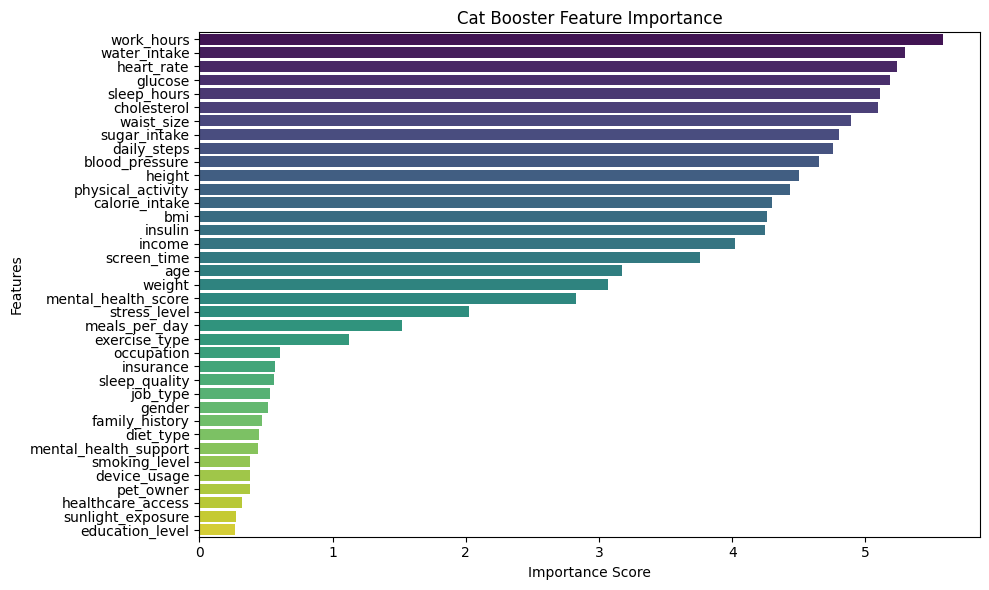

In [155]:
feature_imp = pd.Series(cat_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("Cat Booster Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [156]:
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col} (dtype: {df[col].dtype})")
    print(f"Unique values ({df[col].nunique()}): {df[col].unique()}\n")

Column: gender (dtype: object)
Unique values (2): ['Female' 'Male']

Column: sleep_quality (dtype: object)
Unique values (4): ['Excellent' 'Fair' 'Poor' 'Good']

Column: smoking_level (dtype: object)
Unique values (3): ['Light' 'Non-smoker' 'Heavy']

Column: mental_health_support (dtype: object)
Unique values (2): ['No' 'Yes']

Column: education_level (dtype: object)
Unique values (4): ['Master' 'Bachelor' 'PhD' 'High School']

Column: job_type (dtype: object)
Unique values (6): ['Labor' 'Healthcare' 'Tech' 'Unemployed' 'Office' 'Service']

Column: occupation (dtype: object)
Unique values (6): ['Farmer' 'Teacher' 'Driver' 'Doctor' 'Engineer' 'Artist']

Column: diet_type (dtype: object)
Unique values (4): ['Keto' 'Vegan' 'Vegetarian' 'Omnivore']

Column: exercise_type (dtype: object)
Unique values (3): ['Cardio' 'Mixed' 'Strength']

Column: device_usage (dtype: object)
Unique values (3): ['High' 'Moderate' 'Low']

Column: healthcare_access (dtype: object)
Unique values (3): ['Poor' 'Goo

In [157]:
binary_cols = ['mental_health_support', 'insurance', 'family_history', 'pet_owner']
binary_map = {'Yes': 1, 'No': 0}

encoded_df = df
for col in binary_cols:
    encoded_df[col] = df[col].map(binary_map)

In [158]:
df[['mental_health_support', 'insurance', 'family_history', 'pet_owner']]

,mental_health_support,insurance,family_history,pet_owner
0,0,1,0,0
1,1,0,1,1
2,0,1,0,1
3,0,0,1,1
4,0,0,1,0
...,...,...,...,...
29995,0,1,0,0
29996,0,0,1,0
29997,1,1,1,1
29998,0,1,1,0


In [159]:
sleep_quality_map = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Excellent': 4
}

encoded_df['sleep_quality'] = encoded_df['sleep_quality'].map(sleep_quality_map)

In [160]:
education_map = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

encoded_df['education_level'] = encoded_df['education_level'].map(education_map)

In [161]:
healthcare_map = {
    'Poor': 1,
    'Moderate': 2,
    'Good': 3
}

encoded_df['healthcare_access'] = encoded_df['healthcare_access'].map(healthcare_map)

In [162]:
usage_exposure_map = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}

encoded_df['device_usage'] = encoded_df['device_usage'].map(usage_exposure_map)
encoded_df['sunlight_exposure'] = encoded_df['sunlight_exposure'].map(usage_exposure_map)

In [163]:
for col in encoded_df.select_dtypes(include='object').columns:
    print(f"Column: {col} (dtype: {encoded_df[col].dtype})")
    print(f"Unique values ({encoded_df[col].nunique()}): {encoded_df[col].unique()}\n")

Column: gender (dtype: object)
Unique values (2): ['Female' 'Male']

Column: smoking_level (dtype: object)
Unique values (3): ['Light' 'Non-smoker' 'Heavy']

Column: job_type (dtype: object)
Unique values (6): ['Labor' 'Healthcare' 'Tech' 'Unemployed' 'Office' 'Service']

Column: occupation (dtype: object)
Unique values (6): ['Farmer' 'Teacher' 'Driver' 'Doctor' 'Engineer' 'Artist']

Column: diet_type (dtype: object)
Unique values (4): ['Keto' 'Vegan' 'Vegetarian' 'Omnivore']

Column: exercise_type (dtype: object)
Unique values (3): ['Cardio' 'Mixed' 'Strength']

Column: target (dtype: object)
Unique values (2): ['healthy' 'diseased']



In [164]:
smoking_map = {
    'Non-smoker': 0,
    'Light': 1,
    'Heavy': 2
}
encoded_df['smoking_level'] = encoded_df['smoking_level'].map(smoking_map)

In [165]:
encoded_df = pd.get_dummies(encoded_df, columns=['gender'], drop_first=False, dtype=int)

In [166]:
freq_enc = encoded_df['exercise_type'].value_counts(normalize=True)
encoded_df['exercise_type'] = encoded_df['exercise_type'].map(freq_enc)

In [167]:
freq_enc = encoded_df['diet_type'].value_counts(normalize=True)
encoded_df['diet_type'] = encoded_df['diet_type'].map(freq_enc)

In [168]:
freq_enc = encoded_df['job_type'].value_counts(normalize=True)
encoded_df['job_type'] = encoded_df['job_type'].map(freq_enc)

In [169]:
freq_enc = df['occupation'].value_counts(normalize=True)
encoded_df['occupation'] = encoded_df['occupation'].map(freq_enc)

In [170]:
encoded_df = encoded_df.drop(columns=['target'])

In [171]:
encoded_df.describe()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,target_numeric,gender_Female,gender_Male
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,48.608800,170.009869,70.031260,24.483047,85.056374,120.014711,74.919726,190.123980,99.899929,15.029728,7.022141,2.502333,7.987440,3.049412,7009.147096,2201.278593,60.013969,0.995767,2.011123,6.024522,4.977533,5.037467,0.496300,2.491600,0.166683,0.166693,4021.389542,0.250054,0.376179,2.002700,2.006667,0.501000,1.999067,2.997633,0.497467,0.492967,0.450000,0.499400,0.500600
std,17.924804,9.926014,14.675520,5.932454,12.046838,14.459327,9.260137,29.969603,19.941652,4.550107,1.496812,1.117841,1.999047,1.895934,2394.898135,397.562325,19.870920,0.817662,0.690944,2.931480,3.138060,3.167964,0.499995,1.112432,0.001655,0.002099,1853.723425,0.003642,0.126751,0.817709,0.817544,0.500007,0.816591,1.419728,0.500002,0.499959,0.497502,0.500008,0.500008
min,18.000000,140.000000,40.000000,10.014093,34.093185,60.605842,34.745092,67.641494,18.123387,0.032157,3.000000,1.000000,0.000000,0.000000,1000.000000,621.448191,0.009971,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.163633,0.162867,500.000000,0.243933,0.247467,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,163.279191,59.907063,20.271055,76.880618,110.867877,69.500709,169.968677,86.345592,12.367276,6.004090,2.000000,6.623345,1.641613,5498.759941,1935.377930,46.378403,0.000000,1.532278,3.999436,2.000000,2.000000,0.000000,2.000000,0.165500,0.165400,2770.638397,0.250267,0.250200,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,169.992366,69.964131,24.176267,85.144711,120.014711,75.014065,189.978162,100.003267,14.999907,7.019170,3.000000,8.003487,2.972553,7001.373532,2198.963563,59.913005,1.000000,2.007112,6.002647,5.000000,5.000000,0.000000,2.000000,0.167267,0.167067,3989.135087,0.252700,0.502333,2.000000,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,64.000000,176.698425,79.930583,28.248813,93.146838,129.115435,80.385090,210.380718,113.362198,17.704339,8.045421,4.000000,9.340262,4.337411,8523.239794,2466.964918,73.449395,2.000000,2.480434,8.016445,8.000000,8.000000,1.000000,3.000000,0.167633,0.168100,5208.855516,0.253100,0.502333,3.000000,3.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,79.000000,210.000000,133.799980,56.286478,133.153631,182.799505,113.699566,319.875613,179.855753,35.464749,12.000000,4.000000,16.000000,11.324625,16521.256223,3787.124430,134.872387,2.000000,5.000000,16.000000,10.000000,10.000000,1.000000,4.000000,0.168767,0.169533,11349.443420,0.253100,0.502333,3.000000,3.000000,1.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
encoded_df

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,target_numeric,gender_Female,gender_Male
0,22,162.932524,67.564516,25.450898,97.087870,132.151511,99.337130,189.196300,108.626249,15.046376,6.876157,4,10.422726,3.111490,8368.383309,1850.596805,97.463847,1,2.973462,2.921232,5,10,0,3,0.163633,0.169533,2857.320235,0.243933,0.247467,3,1,1,1,2,0,0,0,1,0
1,47,171.547964,52.804671,17.943254,95.888834,116.171940,67.499438,195.072178,120.528981,8.255944,6.456177,2,7.787357,3.231989,7938.704919,1864.938695,51.709036,0,1.259687,4.832610,4,3,1,2,0.167200,0.169533,6548.228475,0.252700,0.247467,2,1,0,3,3,1,1,1,1,0
2,55,170.966555,44.804159,15.328371,77.344088,127.030570,63.610472,159.772494,99.224745,15.843748,7.320258,2,6.544831,6.138907,5673.534557,1759.140043,38.845329,2,2.316328,4.982927,0,9,0,2,0.165500,0.162867,2549.965306,0.243933,0.502333,3,3,1,3,2,0,1,1,1,0
3,27,178.287821,40.000000,12.583940,61.743057,123.106043,91.380544,212.788297,75.391804,4.965942,4.487325,1,8.634154,1.934497,6233.281463,2291.912789,54.846048,1,2.502264,10.780279,4,0,0,2,0.168767,0.169533,2322.460226,0.253100,0.502333,1,3,0,2,3,1,1,1,1,0
4,24,194.568973,84.264569,22.258599,91.287708,130.915270,64.180530,197.776095,93.184091,14.999907,3.511518,3,4.874924,4.135976,10956.957845,2386.572024,83.220557,0,2.174174,5.453455,5,2,0,2,0.168767,0.162867,4742.466750,0.252700,0.247467,3,1,0,3,4,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,53,162.682355,89.601849,33.856033,89.488454,129.380077,76.063089,198.522946,81.855581,11.018841,8.087586,3,7.176379,2.398722,8514.470177,2343.205984,51.156766,0,2.989209,7.415820,2,3,0,2,0.165500,0.167033,877.435530,0.253100,0.247467,2,3,1,1,4,0,0,1,0,1
29996,23,160.250212,67.624275,26.333307,87.209088,100.658001,65.561732,220.064925,146.131691,17.212978,9.842056,2,5.832487,4.131165,6800.657789,2381.888802,42.161263,2,2.366341,7.491023,10,8,0,2,0.168767,0.168100,5407.141861,0.252700,0.502333,1,2,0,3,1,1,0,0,0,1
29997,68,174.657371,61.878333,20.284522,79.151644,114.879480,61.500441,250.293758,105.553492,14.999907,9.021386,3,5.583392,0.656181,5931.188675,1741.230691,23.744050,1,1.521417,7.955565,10,9,1,1,0.165500,0.167067,2464.960044,0.252700,0.250200,2,2,1,3,3,1,1,0,0,1
29998,73,168.392397,46.486714,16.393961,71.186494,120.014711,79.535017,187.587866,117.829075,20.562741,5.467089,2,8.705341,3.092682,10499.236717,2134.074080,45.629988,1,1.914931,10.511659,1,9,0,3,0.163633,0.167033,7588.911079,0.252700,0.502333,1,1,1,3,2,1,0,0,0,1


<Axes: >

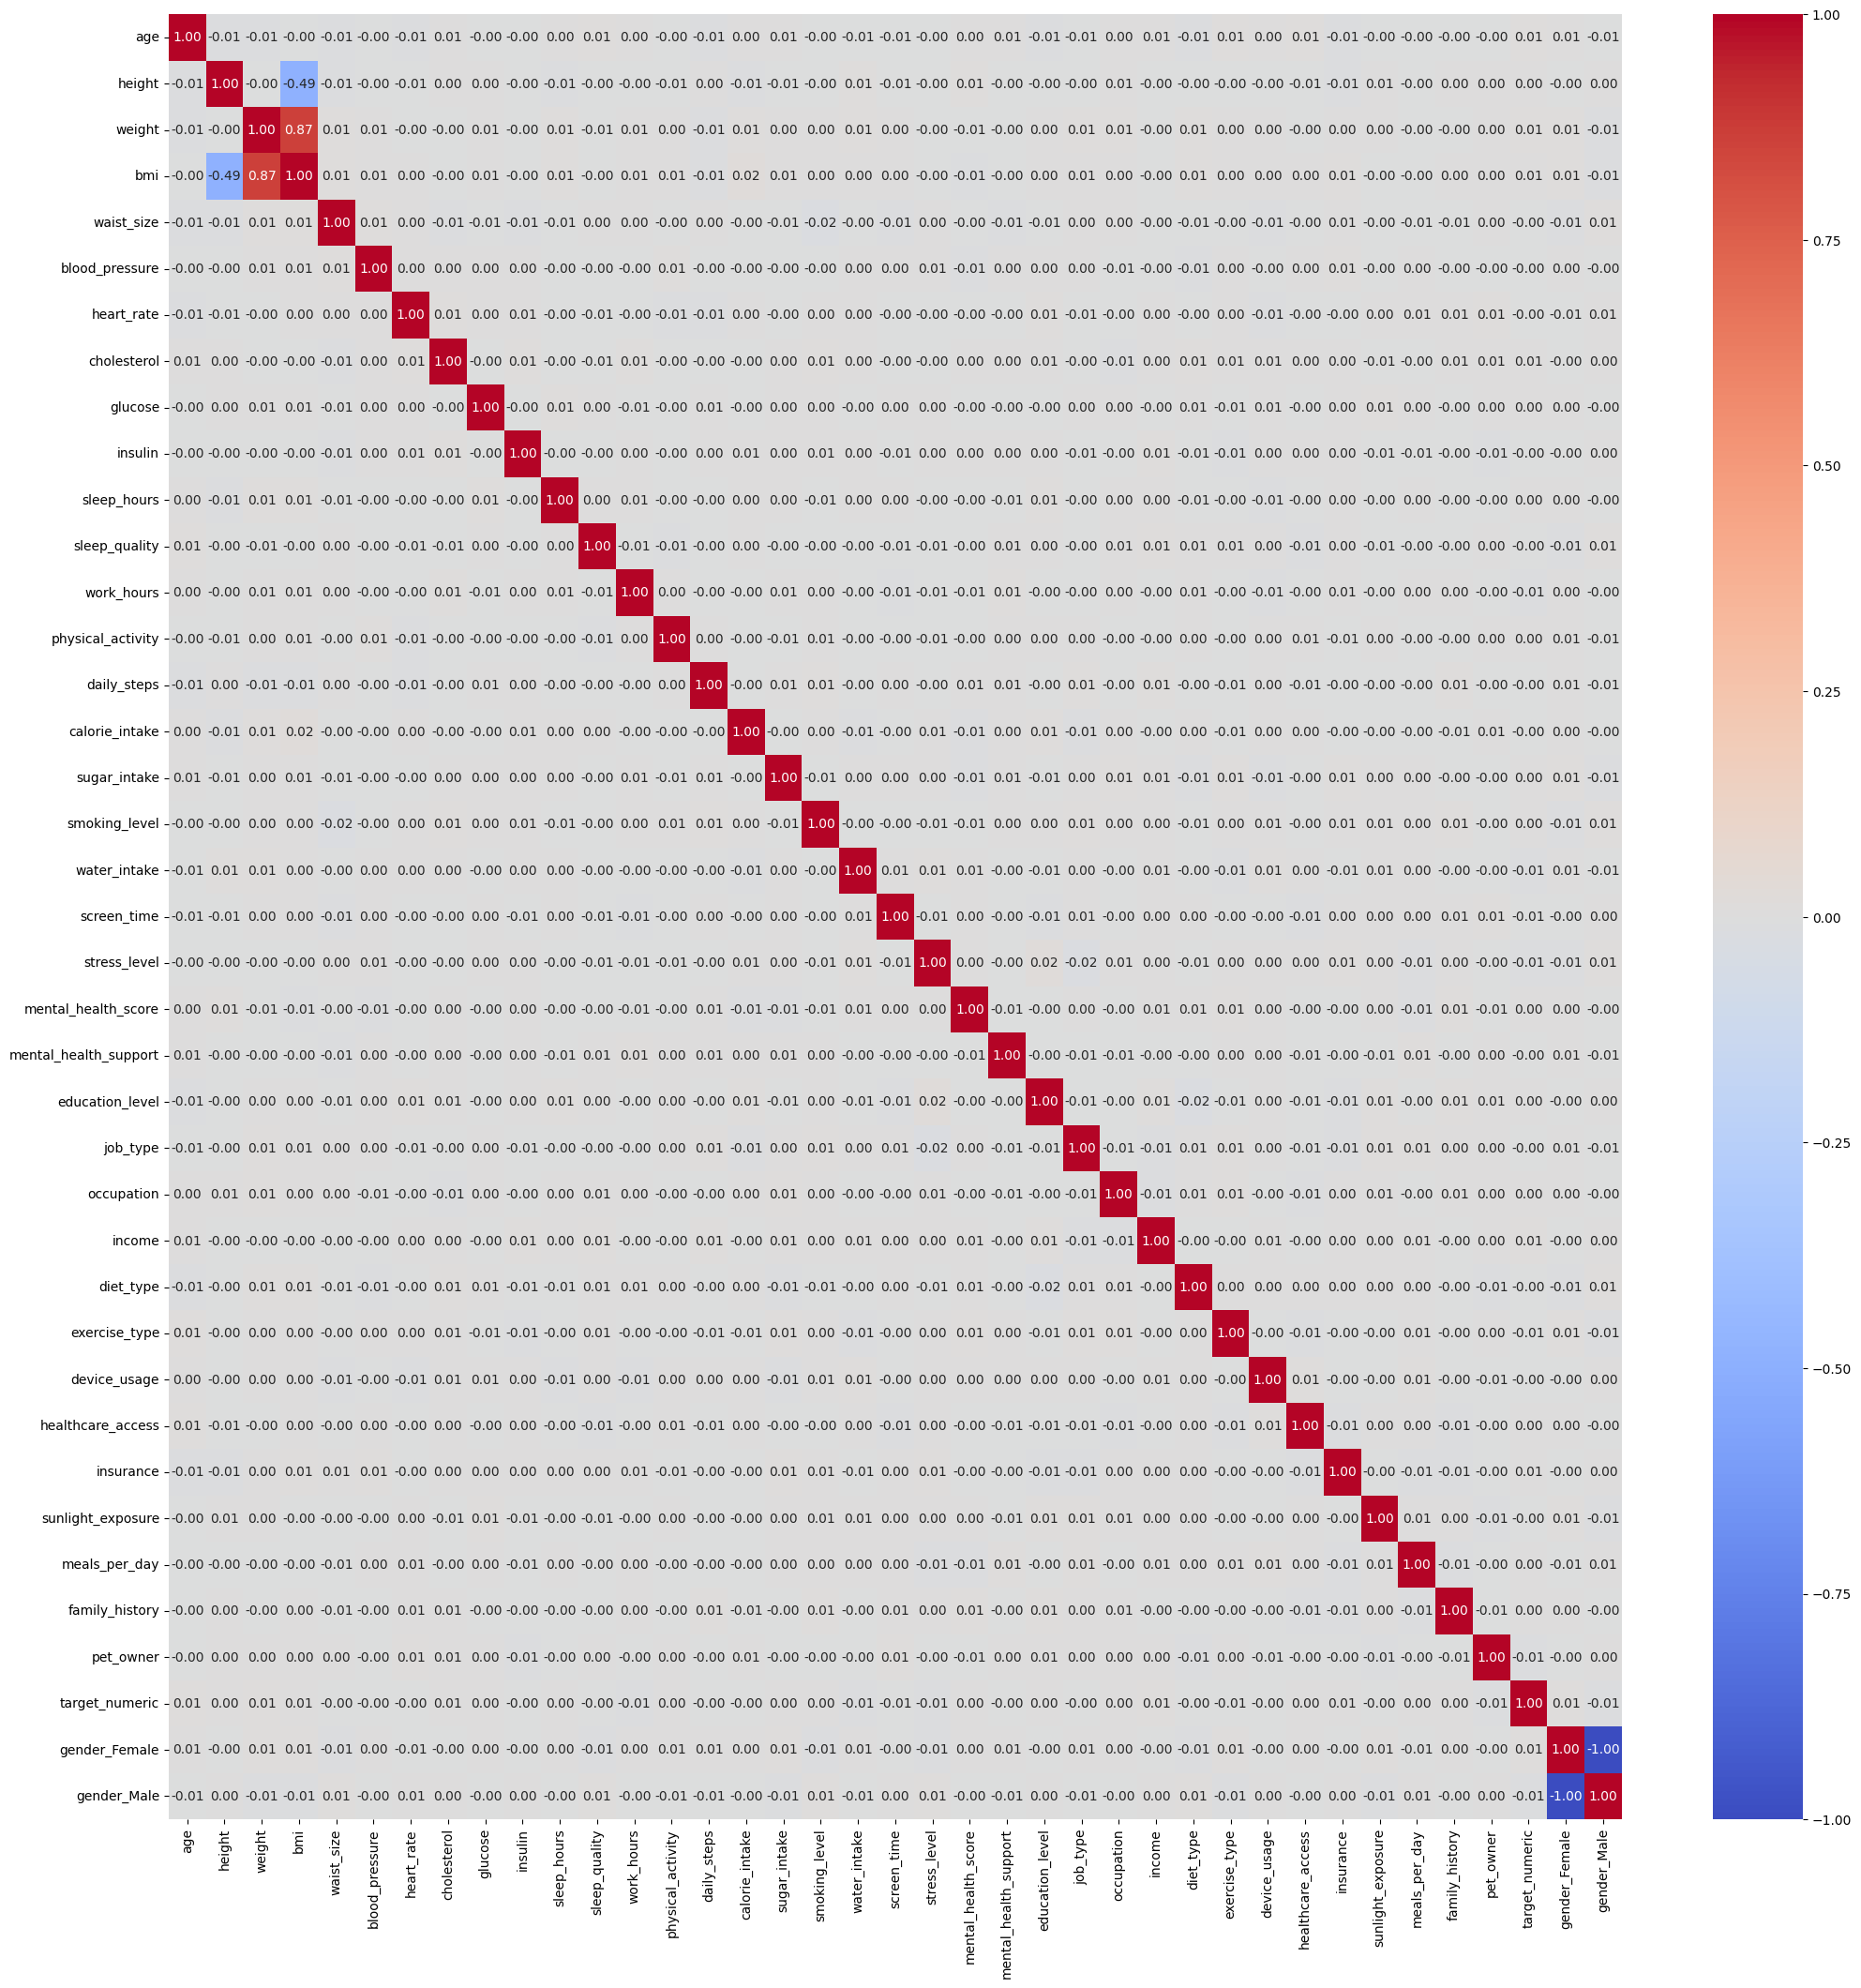

In [173]:
corr = encoded_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [174]:
correlation = encoded_df.corr()['target_numeric'].drop('target_numeric')
correlation.sort_values(ascending=False)

,target_numeric
gender_Female,0.010466
income,0.010072
weight,0.009889
age,0.008505
bmi,0.007767
cholesterol,0.007617
insurance,0.006767
family_history,0.003645
education_level,0.002975
smoking_level,0.002962


In [175]:
X = encoded_df.drop('target_numeric', axis=1)
y = encoded_df['target_numeric']

In [176]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 38), (9000, 38), (21000,), (9000,))

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled

(array([[ 0.47161975, -1.01796562, -1.07498152, ...,  1.0145825 ,
          0.99942873, -0.99942873],
        [ 0.80612444,  0.32686556, -0.62748191, ..., -0.98562709,
          0.99942873, -0.99942873],
        [-0.08588806,  0.59599326,  0.23961787, ...,  1.0145825 ,
          0.99942873, -0.99942873],
        ...,
        [ 0.24861663, -0.25632554, -1.17334968, ...,  1.0145825 ,
         -1.00057159,  1.00057159],
        [ 1.53088461,  1.75784504, -1.23449594, ..., -0.98562709,
         -1.00057159,  1.00057159],
        [-1.36815604,  0.48889289, -1.39154374, ...,  1.0145825 ,
          0.99942873, -0.99942873]]),
 array([[ 0.52737054, -0.93822243, -0.85802616, ...,  1.0145825 ,
         -1.00057159,  1.00057159],
        [-1.03365135,  1.0825096 , -1.31425259, ..., -0.98562709,
         -1.00057159,  1.00057159],
        [-1.4796576 , -0.35725076, -1.08974592, ..., -0.98562709,
         -1.00057159,  1.00057159],
        ...,
        [ 0.80612444,  0.49095361, -0.91816801, ...,  

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, min_samples_leaf=3, min_samples_split=2)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3, random_state=42)

In [180]:
y_pred = rf_model.predict(X_test_scaled)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.81      0.66      4985
           1       0.46      0.20      0.28      4015

    accuracy                           0.54      9000
   macro avg       0.51      0.51      0.47      9000
weighted avg       0.52      0.54      0.49      9000



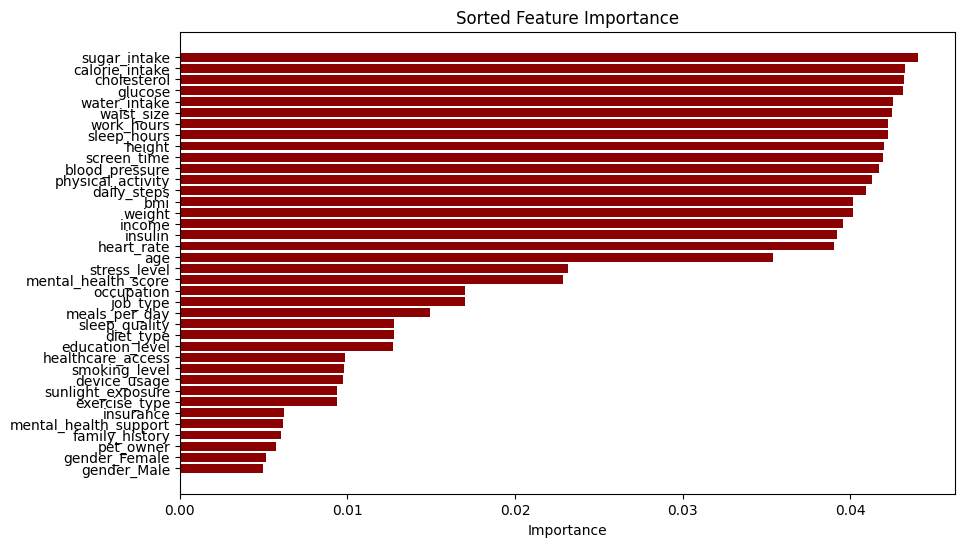

In [181]:
features = X.columns.tolist()
features_importance = rf_model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': features_importance
})

feat_imp = feat_imp.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='darkred')
plt.xlabel('Importance')
plt.title('Sorted Feature Importance')
plt.show()

In [182]:
ada_model = AdaBoostClassifier(
    estimator=rf_model,
    n_estimators=50,
    learning_rate=0.01,
    random_state=42
)

ada_model.fit(X_train_scaled, y_train)

y_pred = ada_model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[4087  898]
 [3290  725]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.82      0.66      4985
           1       0.45      0.18      0.26      4015

    accuracy                           0.53      9000
   macro avg       0.50      0.50      0.46      9000
weighted avg       0.51      0.53      0.48      9000


Accuracy Score: 0.5346666666666666


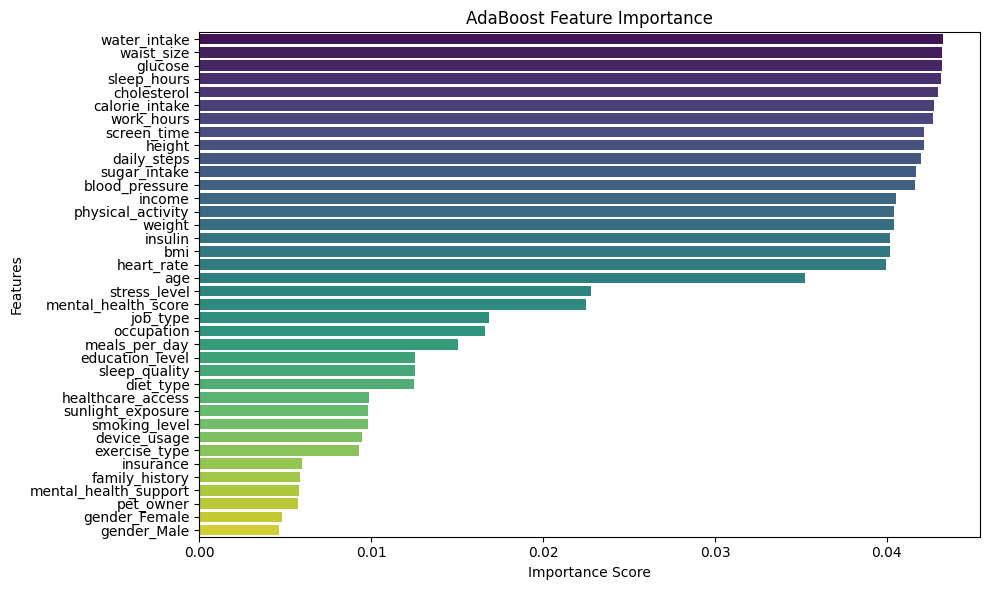

In [183]:
feature_imp = pd.Series(ada_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("AdaBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [184]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.3,
    reg_lambda=1,
    subsample=1,
    colsample_bytree=1,
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:55:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[3149 1836]
 [2629 1386]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.63      0.59      4985
           1       0.43      0.35      0.38      4015

    accuracy                           0.50      9000
   macro avg       0.49      0.49      0.48      9000
weighted avg       0.49      0.50      0.49      9000


Accuracy Score: 0.5038888888888889


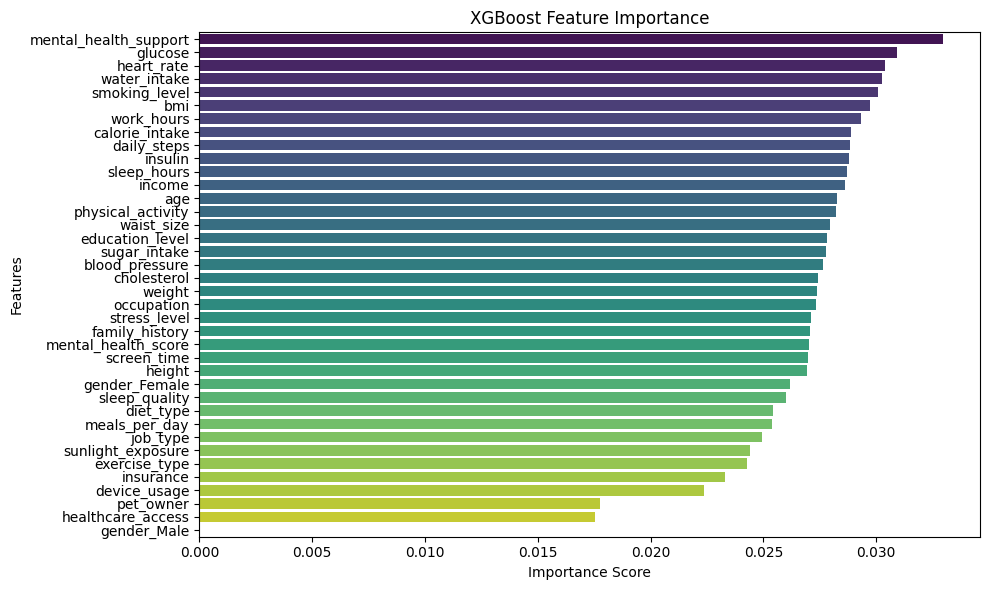

In [185]:
feature_imp = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [186]:
!pip install catboost

In [187]:
lgbm_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    num_leaves=35,
    max_depth=10,
    learning_rate=0.01,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    verbose=-1,
    scale_pos_weight= 1.22,
    reg_lambda=1.0,
    random_state=42
)
lgbm_model.fit(X_train_scaled, y_train)

y_pred = lgbm_model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
 [[2705 2280]
 [2141 1874]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55      4985
           1       0.45      0.47      0.46      4015

    accuracy                           0.51      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.51      0.51      0.51      9000


Accuracy Score: 0.5087777777777778


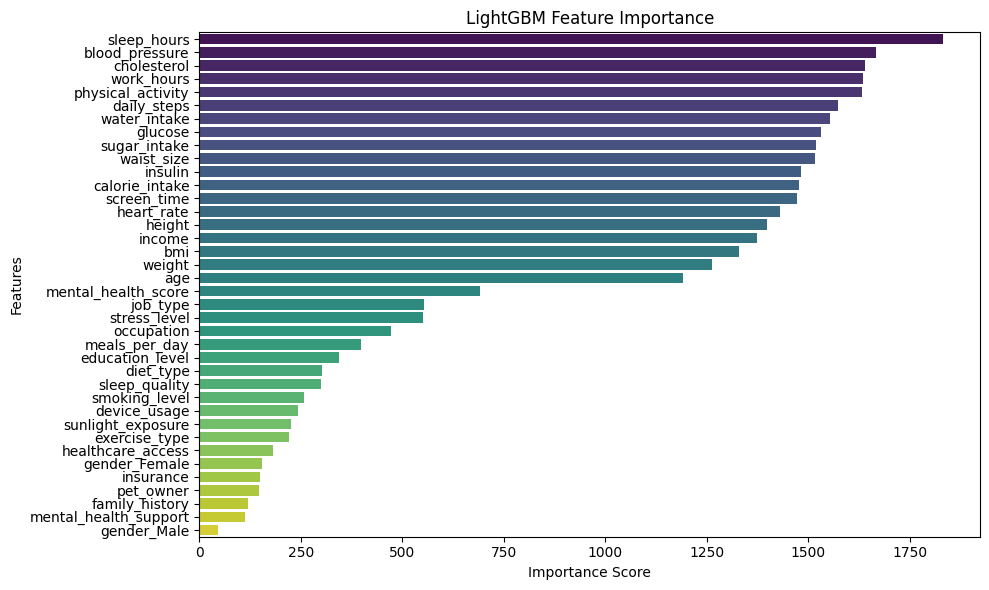

In [188]:
feature_imp = pd.Series(lgbm_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [189]:
cat_model = CatBoostClassifier(iterations=1000, learning_rate=0.03, depth=6, eval_metric='Logloss', random_seed=42, verbose=0)

In [204]:
from imblearn.pipeline import Pipeline  # ✅ Correct pipeline for SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Split your already scaled and encoded data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Pipeline: SMOTE → PCA → XGBoost
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('xgb', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# Fit
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:07:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[2490 2460]
 [2012 2038]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.50      0.53      4950
           1       0.45      0.50      0.48      4050

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.51      0.50      0.50      9000


Accuracy Score: 0.5031111111111111
